# Análisis de los 25 retailers más grandes de Estados Unidos

In [ ]:
# Importar librerías aquí
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importar datos aquí
df = pd.read_csv('/work/largest_retailers.csv')
# I added df.head() to test the data loaded correctly but it is like a spoiler of what´s next so I took it off.

In [ ]:
df.describe()

,Sales,Stores,Sales/Avg. Store,Store Count Growth
count,25.000000,25.000000,23.000000,23.000000
mean,71063.080000,3189.240000,36.870966,0.040230
std,125405.727644,3984.120117,40.625277,0.068552
min,16592.000000,0.000000,1.563919,-0.059515
25%,24402.000000,794.000000,11.263462,-0.001860
50%,34980.000000,1772.000000,25.997733,0.019520
75%,71687.000000,3931.000000,41.358955,0.078934
max,658119.000000,14250.000000,187.795620,0.255662


At glance:

There is a massive gap from the min and max sales. This is probably because of an outlier (an extraordinary performer)

There´s another outlier in sales/avg.

There are companies that have a negative 'growth'. Meaning they are reducing the number of open stores they currently have.

## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

In [ ]:
df_sorted_sales = df.sort_values('Sales', ascending=False)
print('Average sale without the outlier: ')
w = df_sorted_sales['Sales'][1:24].mean() #average without number one
w = round(w, 2)
w = str(w)
print('$' + w + ' million USD')

Average sale without the outlier: 
$47907.22 million USD


In [ ]:
print('Average sale of all 25 retailers: ')
r = df['Sales'].mean() #average of all 25 stores
r = round(r, 2)
r = str(r)
print('$' + r + ' million USD')

Average sale of all 25 retailers: 
$71063.08 million USD


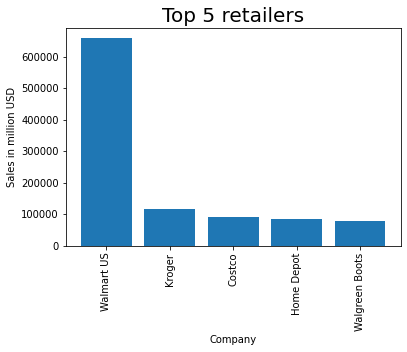

In [ ]:
x_sales = df_sorted_sales['Company'][0:5] 
y_sales = df_sorted_sales['Sales'][0:5]

plt.bar(x_sales, y_sales)
plt.title('Top 5 retailers', fontsize=20)
plt.xlabel('Company')
plt.ylabel('Sales in million USD')
plt.xticks(rotation='vertical') 

plt.show()

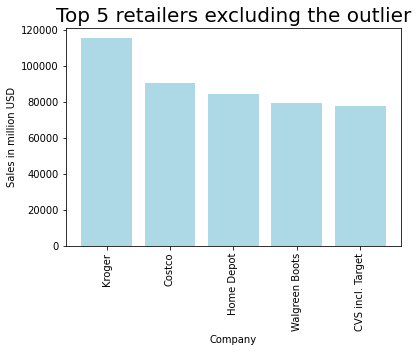

In [ ]:
x_sales1 = df_sorted_sales['Company'][1:6]
y_sales1 = df_sorted_sales['Sales'][1:6]

plt.bar(x_sales1, y_sales1, color = '#add8e6')
plt.title('Top 5 retailers excluding the outlier', fontsize=20)
plt.xlabel('Company')
plt.ylabel('Sales in million USD')
plt.xticks(rotation='vertical') 

plt.show()

We&nbsp;can&nbsp;see&nbsp;that&nbsp;the&nbsp;sales&nbsp;average&nbsp;drastically&nbsp;comes&nbsp;down&nbsp;when&nbsp;we&nbsp;don´t&nbsp;include&nbsp;Walmart.

Walmart&nbsp;sells&nbsp;around&nbsp;five&nbsp;times&nbsp;more&nbsp;than&nbsp;its&nbsp;closest&nbsp;competitor&nbsp;(we&nbsp;found&nbsp;our&nbsp;outliner)&nbsp;as&nbsp;shown&nbsp;in&nbsp;the&nbsp;previous graphs.&nbsp;

### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

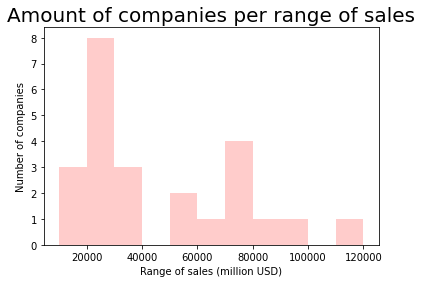

In [ ]:
df_sorted_sales = df.sort_values('Sales', ascending=0)
bins = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000]
plt.hist(df_sorted_sales['Sales'][1:], bins, color = '#ffcccb') #Walmart not included
plt.xlabel('Range of sales (million USD)')
plt.ylabel('Number of companies')
plt.title('Amount of companies per range of sales', fontsize=20)

plt.show()

We can infer from this data is that is hard to pass the 40,000 mark because more than half of the sample is within that range.

Only 3/25&nbsp;stores&nbsp;sell&nbsp;more than&nbsp;80,000&nbsp;millions&nbsp;USD.&nbsp;(Excluding walmart)

Only&nbsp;one&nbsp;company&nbsp;(Kroger) besides&nbsp;the outlier Walmart, surpasses&nbsp;the&nbsp;100,000&nbsp;million&nbsp;mark.

Walmart is not included because it sells five times more than the second place.

### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

In [ ]:
print('Minimum amount of stores: ')
df['Stores'].min()

Minimum amount of stores: 


0

In [ ]:
print('Maximum amount of stores: ')
df['Stores'].max()

Maximum amount of stores: 


14250

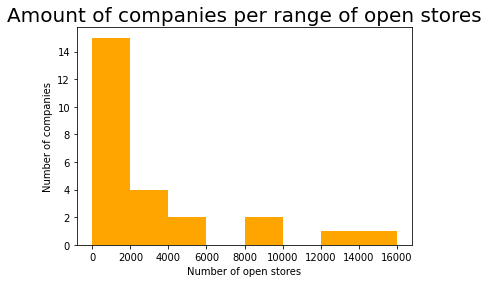

In [ ]:
bins=[0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000]
plt.hist(df['Stores'], bins, color = 'orange') 
plt.xlabel('Number of open stores')
plt.ylabel('Number of companies')
plt.title('Amount of companies per range of open stores', fontsize=20)

plt.show()

More than half of the companies have less than 2,000 stores. 

Also&nbsp;more&nbsp;than&nbsp;half&nbsp;of&nbsp;the&nbsp;companies&nbsp;sell&nbsp;less&nbsp;than&nbsp;$40,000&nbsp;millions USD (as&nbsp;shown&nbsp;in&nbsp;point&nbsp;2).&nbsp;

We have at least one company that sells entirely online because the minimum value of open stores is 0.

Does&nbsp;having&nbsp;more&nbsp;stores&nbsp;mean&nbsp;more&nbsp;sales?&nbsp;

Stay&nbsp;tuned&nbsp;for&nbsp;the&nbsp;next&nbsp;chapter&nbsp;to&nbsp;find&nbsp;out.&nbsp;To&nbsp;be&nbsp;continued...

### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

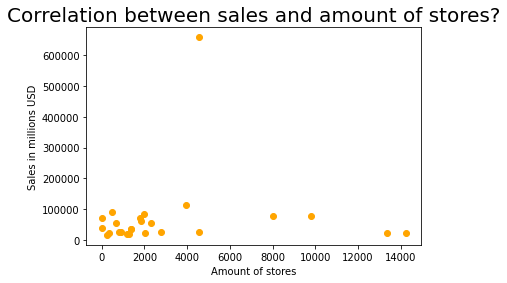

In [ ]:
stores = df['Stores']
sales = df['Sales']

plt.scatter(stores, sales, color = 'orange')
plt.xlabel('Amount of stores')
plt.ylabel('Sales in millions USD')
plt.title('Correlation between sales and amount of stores?', fontsize=20)

plt.show()

There is no correlation between amount of stores and total sales. 

It&nbsp;is&nbsp;not&nbsp;recommended&nbsp;to&nbsp;open&nbsp;up&nbsp;more&nbsp;stores&nbsp;because&nbsp;most likely costs&nbsp;will&nbsp;go&nbsp;up&nbsp;but&nbsp;sales&nbsp;won´t.

Again, we can see that more than half of our data has less than 2,000 stores and only 2/25 surpass the 100,000 million mark

### 5. ¿Cuál es el rango que existe entre las ventas?

In [ ]:
s = df['Sales'].min()
print('Minimum sale: ')
s = round(s, 2)
s = str(s)
print('$' + s + ' million USD')


Minimum sale: 
$16592 million USD


In [ ]:
t = df['Sales'].max()
print('Maximum sale: ')
t = round(t, 2)
t = str(t)
print('$' + t + ' million USD')

Maximum sale: 
$658119 million USD


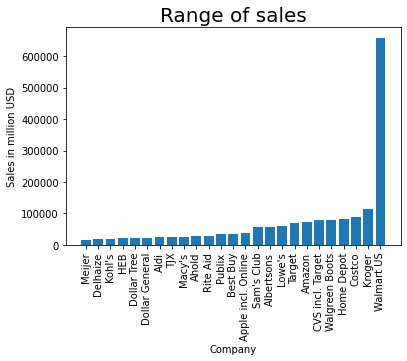

In [ ]:
df_sorted_sales = df.sort_values('Sales', ascending=1)
minimum = df_sorted_sales['Sales']#[::-1] #we can put ascending=0 and make it start in reverse
maximum = df_sorted_sales['Company']#[::-1]

plt.bar(maximum, minimum)
plt.title('Range of sales', fontsize=20)
plt.xlabel('Company')
plt.ylabel('Sales in million USD')
plt.xticks(rotation='vertical')
plt.show()

There is an enormous breach between the lowest and highest seller. For smaller competitors, gaining market share will be difficult, specially because of two main factors: more stores does not mean more sales and Walmart's dominance.

### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

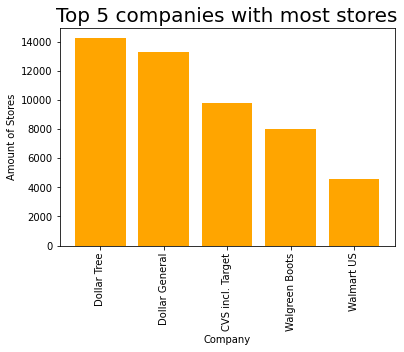

In [ ]:
df_sorted_stores = df.sort_values('Stores', ascending=False)
x_stores = df_sorted_stores['Stores'][0:5]
y_stores = df_sorted_stores['Company'][0:5]

plt.bar(y_stores, x_stores, color = 'orange')
plt.title('Top 5 companies with most stores', fontsize=20)
plt.xlabel('Company')
plt.ylabel('Amount of Stores')
plt.xticks(rotation='vertical') 
plt.show()

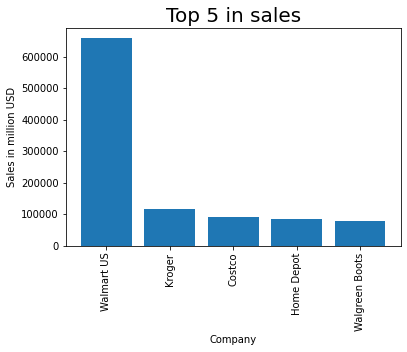

In [ ]:
df_sorted_sales = df.sort_values('Sales', ascending=False)
x_sales = df_sorted_sales['Company'][0:5] 
y_sales = df_sorted_sales['Sales'][0:5]

plt.bar(x_sales, y_sales)
plt.title('Top 5 in sales', fontsize=20)
plt.xlabel('Company')
plt.ylabel('Sales in million USD')
plt.xticks(rotation='vertical') 
plt.show()

As we saw previously, more stores != more sales. 



Dollar Tree, Dollar General and CVS incl. Target should focus on increasing average sale per store. They have the most amount of stores but it is not refelcted in total sales.

Walmart and Walgreen Boots have a good ratio between amount of stores and total sales. They both appear in the top 5 in those categories. We need to dive deeper into their actions to see if we can replicate and adecuate their success to our own project.

While Kroger, Costco and Home Depot might be the ones that benefit from opening more stores because they are in the top five of total sales but they don´t appear in the list of the companies with the most amount of open stores. We need to see their average sale per store (and more data) to see if it is actually convenient.

## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

<AxesSubplot:xlabel='Category', ylabel='Sales'>

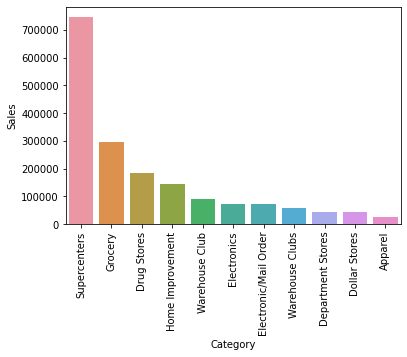

In [ ]:
df_category = df.groupby(['Category']).agg({'Sales' : sum})
df_category = df_category.reset_index()
df_category = df_category.sort_values('Sales', ascending=0)
chart = sns.barplot(data = df_category, x = 'Category', y = 'Sales')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
chart

This graph is tricky because all Walmart sales are considered Supercenter, so let´s take it out:

Without Walmart, supercenter would move to fifth place with a total sale of almost 90,000 millions USD

Grocery is about 50% bigger than Drug Stores.

However, this data has to be taken with a 'grain of salt' because Warehouse Club and Warehouse Clubs (notice the difference in the 'S') represent Costco and Sam's respectively and within those big categories (like Supercenters) there are smaller categories.

That´s why this data is not conclusive. 

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

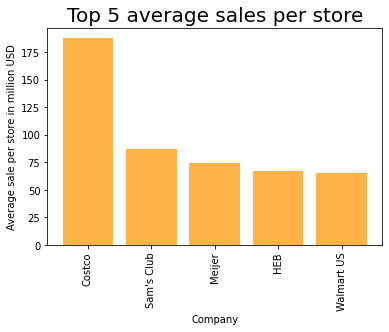

In [ ]:
df_sorted_avg_store = df.sort_values('Sales/Avg. Store', ascending=False)

avg = df_sorted_avg_store['Sales/Avg. Store'][0:5]
sales_ = df_sorted_avg_store['Company'][0:5]

plt.bar(sales_, avg, color = '#ffb347')
plt.title('Top 5 average sales per store', fontsize = 20)
plt.xlabel('Company')
plt.ylabel('Average sale per store in million USD')
plt.xticks(rotation='vertical') 
plt.show()

Costco&nbsp;has&nbsp;more&nbsp;than&nbsp;double&nbsp;average&nbsp;sales&nbsp;per&nbsp;store&nbsp;(187.80 million USD)&nbsp;than&nbsp;number&nbsp;two&nbsp;(Sam's&nbsp;club:&nbsp;87.30 million USD). They should focus on opening up more stores.&nbsp;

Walgreen Boots was in the top 5 in both 'open stores' and 'sales' but their 'average sale per store' did not make the cut. Along with Dollar Tree, Dollar General and CVS incl. Target, these 4 companies should focus on improving average sales per store because they have the most amount of open stores.

We can see why Walmart is the outlier. It appears in both the top 5 of amount of open stores and average sale per store.

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

In [ ]:
only_online = df_sorted_stores[23:25]
only_online

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
11,Apple incl. Online,37664,0,NaN,NaN,Electronics
6,Amazon,71687,0,NaN,NaN,Electronic/Mail Order


Neither these two companies can be considered to have a remarkable performance. In fact, Apple incl. Online is below average.

If anything, they probably have better margins because they don´t have the usual costs of stores, but we need to dive deeper into their finances and other data.

## III. Tus propias preguntas

### 10. Which retailer is growing faster?

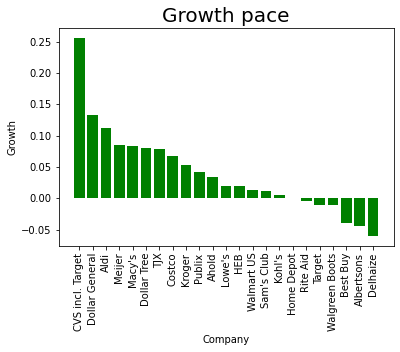

In [ ]:
df_sorted_growth = df.sort_values('Store Count Growth', ascending=False)

growth = df_sorted_growth['Store Count Growth'][:23] #to exclude both retailers that sell exclusively online
company = df_sorted_growth['Company'][:23]

plt.bar(company, growth, color = 'green')
plt.title('Growth pace', fontsize = 20)
plt.xlabel('Company')
plt.ylabel('Growth')
plt.xticks(rotation='vertical') 

plt.show()

CVS incl. Target and Dollar General should focus on increasing average sale per store intead of opening more stores because they already are in the top 5 of open stores without being in the top 5 of sales.

Meijer is on a good direction because their average sale per store is third highest and opening up more stores is the right strategy.

Why are some companies closing stores? Was it forced? Voluntarily? Because of the pandemic? Are they pivoting to more online sales? Unfortunately we can´t asnwer that with this data set .

### 11. Which retailer has the least amount of stores? (Excluding those that sell exclusively online)

In [ ]:
print('Average stores per company: ')
df['Stores'].mean()

Average stores per company: 


3189.24

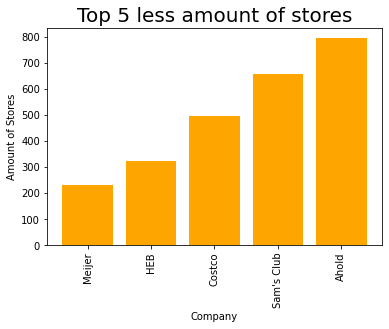

In [ ]:
df_sorted_stores = df.sort_values('Stores', ascending=1)
x_stores = df_sorted_stores['Stores'][2:7]#To exclude those that only sell online
y_stores = df_sorted_stores['Company'][2:7]

plt.bar(y_stores, x_stores, color = 'orange')
plt.title('Top 5 less amount of stores', fontsize = 20)
plt.xlabel('Company')
plt.ylabel('Amount of Stores')
plt.xticks(rotation='vertical') 
plt.show()

All five companies, have less than 800 stores each. Not even close to the average.

Costco is remarkable, with only that amount of stores manages to be in the top 3 of sales thanks to their exceptional average sale per store.

### 12. Which retailer has the worst average sale per store?

In [ ]:
print('Average sale per store of all retailers: ')
z = df['Sales/Avg. Store'].mean()
z = round(z, 2)
z = str(z)
print('$' + z + ' million USD')

Average sale per store of all retailers: 
$36.87 million USD


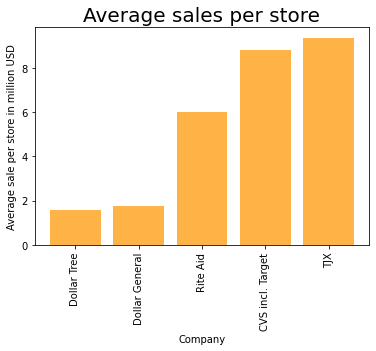

In [ ]:
df_sorted_avg_store = df.sort_values('Sales/Avg. Store', ascending=1)

avg = df_sorted_avg_store['Sales/Avg. Store'][:5]
sales_ = df_sorted_avg_store['Company'][:5]

plt.bar(sales_, avg, color = '#ffb347')
plt.title('Average sales per store', fontsize=20)
plt.xlabel('Company')
plt.ylabel('Average sale per store in million USD')
plt.xticks(rotation='vertical') 
plt.show()

We can observe that there´s a tendency between having less stores and a high average sale. 

We can infere that it gets harder to manage more stores and profitability goes down. Expansion might not always be the best strategy specially when net profit does not go up with the increased revenue.

Another thing we need to keep in mind is that buying in bulk is not the same as dollar stores and each company has their own business model: some may rely on volume to be profitable while others have a greater margin. 

This doesn´t mean blindly opening up more stores to have more volume, we saw it doesn´t work that way.

According to our needs we can adequate our strategy while getting inspiration from other retailers that are getting the desired results, that´s why the main focus of this analysis was top 5 performers.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=debd956d-27c4-4345-a2bc-4c5c2c4a5d61' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>